In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [21]:
df = pd.read_csv('train.csv')

In [22]:
#Antes de mudar formatos

# SEATS __________________________________________________
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

# FUEL TYPE __________________________________________________
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print()
print(valores_unicos_fuel_type)

# KMS __________________________________________________
#remove kms from kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
# Remover vírgula e espaço em branco da coluna 'kms_driven'
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER __________________________________________________
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Converter os valores não NaN para float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power

# OWNER TYPE __________________________________________________
# Removendo espaços em branco na coluna 'owner_type'
df.dropna(subset=['owner_type'], inplace=True)

# Verificando os valores únicos após a remoção dos espaços em branco
unique_values = df['owner_type'].unique()
print()
print(unique_values)

Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:

['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']

['First Owner' 'Third Owner' 'Second Owner' 'Fifth Owner' 'Fourth Owner']


In [23]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
})

In [24]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name             object
registered_year       object
engine_capacity      float64
insurance             object
transmission_type     object
kms_driven           float64
owner_type            object
fuel_type             object
max_power            float64
seats                float64
mileage               object
body_type             object
city                  object
resale_price_Lakh    float64
dtype: object


In [25]:
#Elimina brancos ou NAN 
# KMS __________________________________________________
df = df.dropna(subset=['kms_driven'])
# MAX POWER __________________________________________________
df = df.dropna(subset=['max_power'])
print(df['max_power'])

0         83.8
1         88.7
2        117.3
3        167.6
4         83.1
         ...  
13951    197.2
13952     81.8
13953    108.6
13954     88.5
13955     86.7
Name: max_power, Length: 13828, dtype: float64


In [26]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

# Sua coluna de tipos de combustível
fuel_types = df['fuel_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

# Imprimir cabeçalho informativo
print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Criar nova coluna 'id_fuel_type' no DataFrame
df['id_fuel_type'] = df['fuel_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.18656511905450676
         Diesel: 0.5004767411736883
            CNG: 1.5430641849448568
       Electric: 2.459518133494782
            LPG: 2.798336690048163
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954     

In [27]:
# OWNER TYPE __________________________________________________

# Sua coluna de tipos de combustível
owner_types = df['owner_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types)  # contagem de documentos que contêm este tipo de proprietário
    idf[owner_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_owner_type'] = df['owner_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

    First Owner: 0.1521558275247053
    Third Owner: 1.3575706797951117
   Second Owner: 0.6172730385271412
    Fifth Owner: 2.54969476384387
   Fourth Owner: 2.1073356153834193
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi      

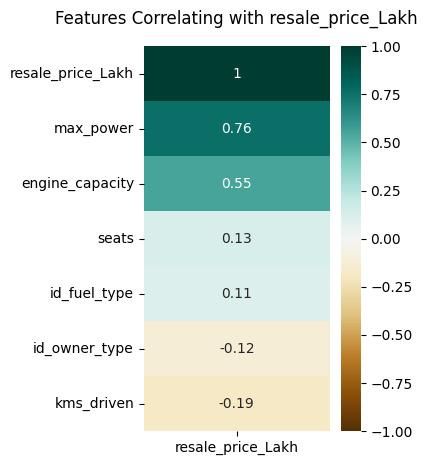

In [28]:
#correlation  

# Select columns
columns_of_interest = ['seats','engine_capacity','id_fuel_type','kms_driven','max_power','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()